# Bike Sharing System

Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.

## Objective:
- Predicting the Bike Sharing Demand through a Random Forest Regressor Model
- EDA (Exploratory Data Analysis)
- Data Processing
- Data Transformation

## Tech Stacks:
- Python
- Pandas *Library*
- Numpy *Library*
- Matplotlib.pyplot *Library*
- Seaborn *Library*
- Sklearn *Library*


## Datasets:
You can find the datasets used in this project through the following Kaggle's Link:
https://www.kaggle.com/competitions/bike-sharing-demand

-------------------------------------------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error

In [2]:
data = pd.read_csv('train.csv') #reading the data

In [3]:
bike = data.copy() #taking a copy of the dataset

In [4]:
bike.drop(['registered','casual'],axis=1, inplace = True) #dropping 2 columns ['registered','casual']

## EDA Phase 1

In [5]:
bike.head(10) #reading first 10 rows

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,14


In [6]:
bike.info() #Fitching information about the columns in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   count       10886 non-null  int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 850.6+ KB


In [7]:
bike.isnull().sum() #Figuring out if there are any null values

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
dtype: int64

In [8]:
bike.describe() #Quick Descriptive Statistics

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,977.000000


In [9]:
bike.describe(include='object') #Quick Descriptive Statistics

,datetime
count,10886
unique,10886
top,2011-01-01 00:00:00
freq,1


<AxesSubplot:>

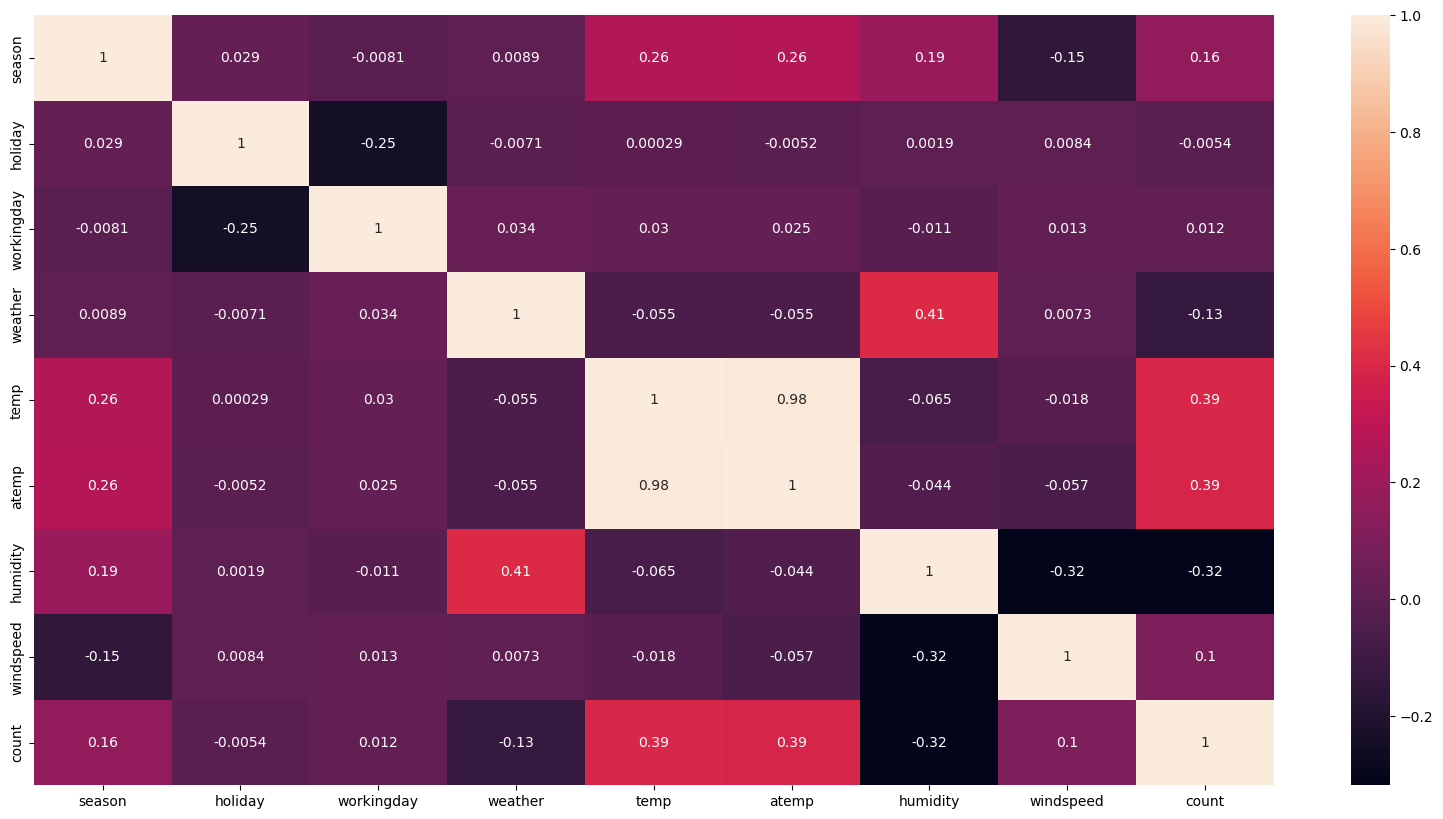

In [10]:
#Figuring out the correlation between the columns and ['Count']
plt.figure(figsize=(20,10))
sns.heatmap(bike.corr(), annot=True)

## Trying a Linear Regression Model based on `temp`, `windspeed` and `humidity`

In [11]:
x = bike[['temp','windspeed','humidity']]
y = bike['count']

In [12]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.3, random_state = 0) #(70,30) Train, Validation Split

In [13]:
lr = LinearRegression()

In [14]:
lr.fit(x_train,y_train)

LinearRegression()

In [15]:
lr_1_y_train_pred = lr.predict(x_train)
lr_1_y_train_pred = np.where(lr_1_y_train_pred < 0, 0, lr_1_y_train_pred) #Handling Negative Values as Mean Squared Log Error doesn't accept negative values

In [16]:
lr_1_y_val_pred = lr.predict(x_val)
lr_1_y_val_pred = np.where(lr_1_y_val_pred < 0, 0, lr_1_y_val_pred) #Handling Negative Values as Mean Squared Log Error doesn't accept negative values

In [17]:
train_pred_result = mean_squared_log_error(y_train, lr_1_y_train_pred) #MSLE Score
print(train_pred_result)

1.9456149760783126


In [18]:
val_pred_result = mean_squared_log_error(y_val, lr_1_y_val_pred) #MSLE Score
print(val_pred_result)

1.931019780105319


# Conclusion:

- The data doesn't contain any nulls
- `Count` column has a positive correlation with `temp` and `atemp` which we will have to choose one of them as they are both the same thing, Moreover, There's a negative correlation with `Humidity` and a possible correlation with `Windspeed` and `season`
- The model has a bad score *(Or perhaps the model itself is not proper, Hence, I will test a different model in the next few phases)* and hence we should move on with EDA phase 2 and figure out if there are outliers to be handled

## EDA Phase 2 | Finding and Handling Outliers

### Count Column

<AxesSubplot:xlabel='count', ylabel='Count'>

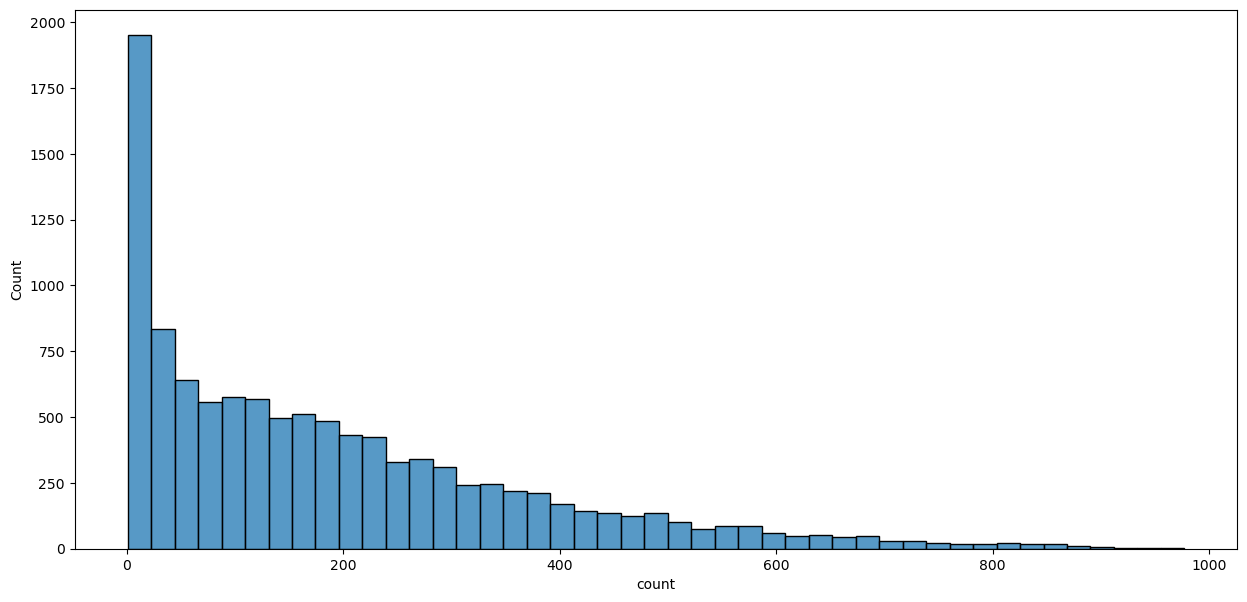

In [19]:
#Detecting outliers in Count Columns
plt.figure(figsize=(15,7))
sns.histplot(data = bike, x= bike['count'])

In [20]:
#There are outliers, Hence, Let's handle them as they would harm the score of our model
bike = bike[abs(bike['count'] - bike['count'].mean()) < 3 * bike['count'].std()] #Handling Outliers through Z-Score

<AxesSubplot:xlabel='count', ylabel='Count'>

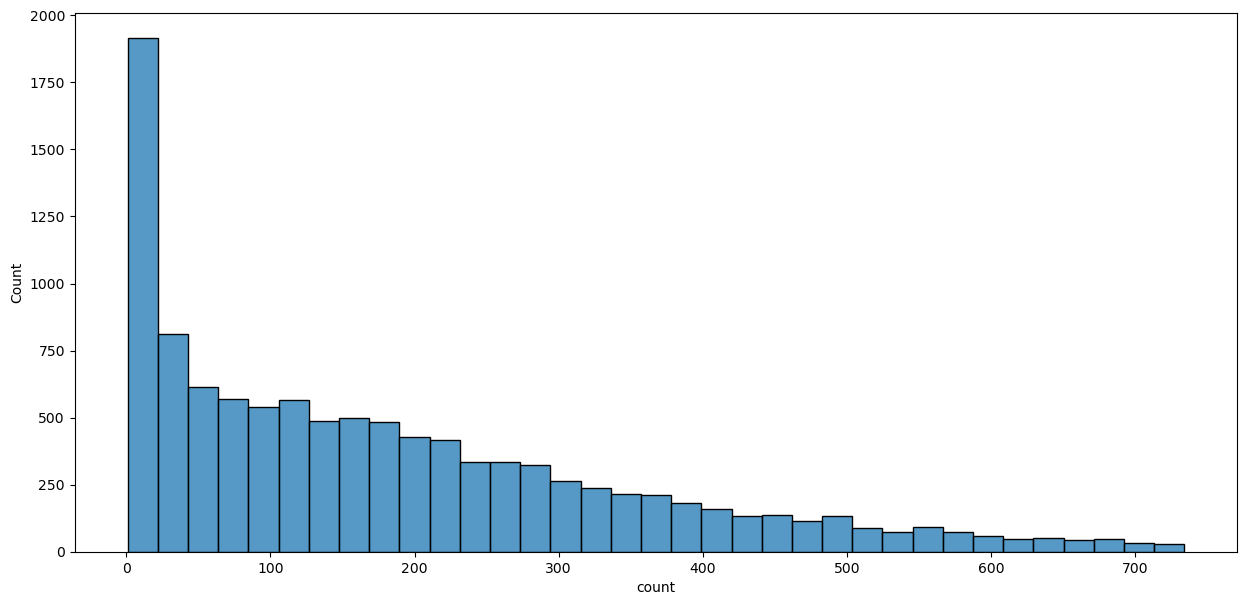

In [21]:
#Validating the changes
plt.figure(figsize=(15,7))
sns.histplot(data = bike, x= bike['count'])

### Humidity Column

<AxesSubplot:xlabel='humidity', ylabel='Count'>

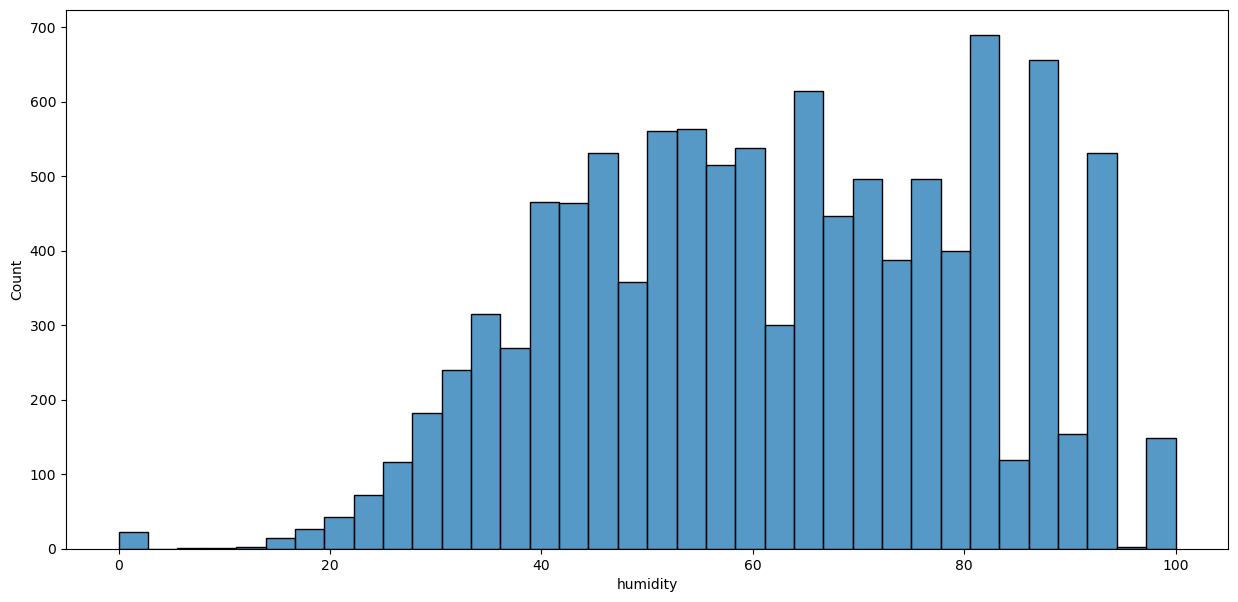

In [22]:
#Detecting outliers in Humidity Columns
plt.figure(figsize=(15,7))
sns.histplot(data = bike, x = bike.humidity)

In [23]:
#There are outliers, Let's handle them using np.where()
bike['humidity'] = np.where(bike.humidity < 20, 20, bike.humidity)

<AxesSubplot:xlabel='humidity', ylabel='Count'>

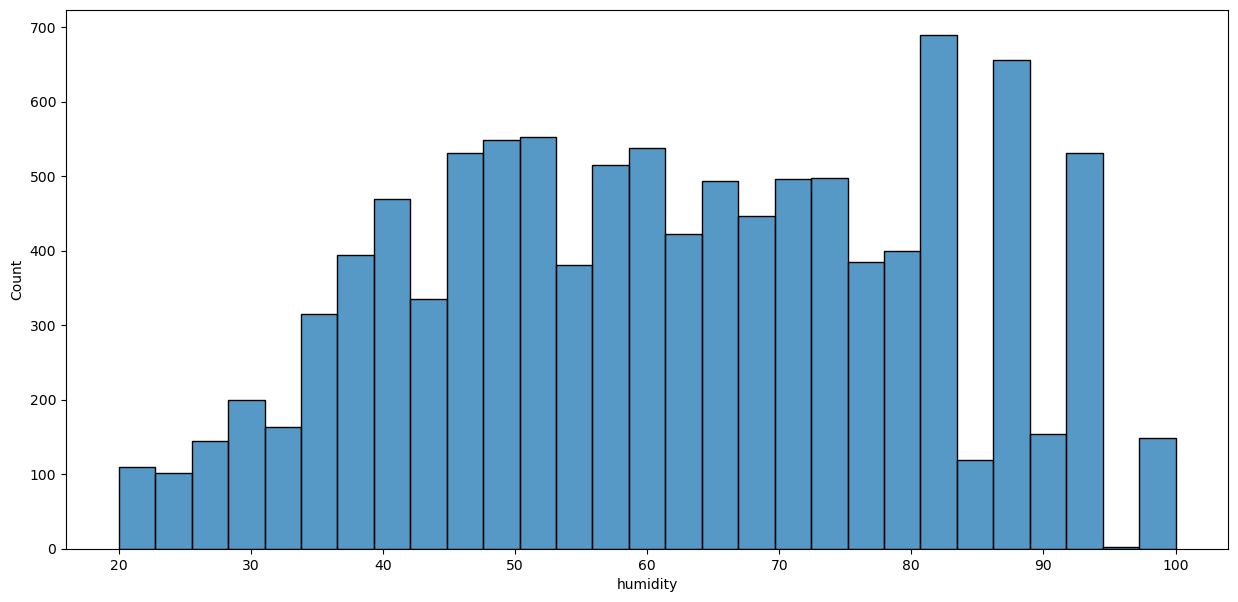

In [24]:
#Validating the changes
plt.figure(figsize=(15,7))
sns.histplot(data = bike, x = bike.humidity)

### Windspeed Column

<AxesSubplot:xlabel='windspeed', ylabel='Count'>

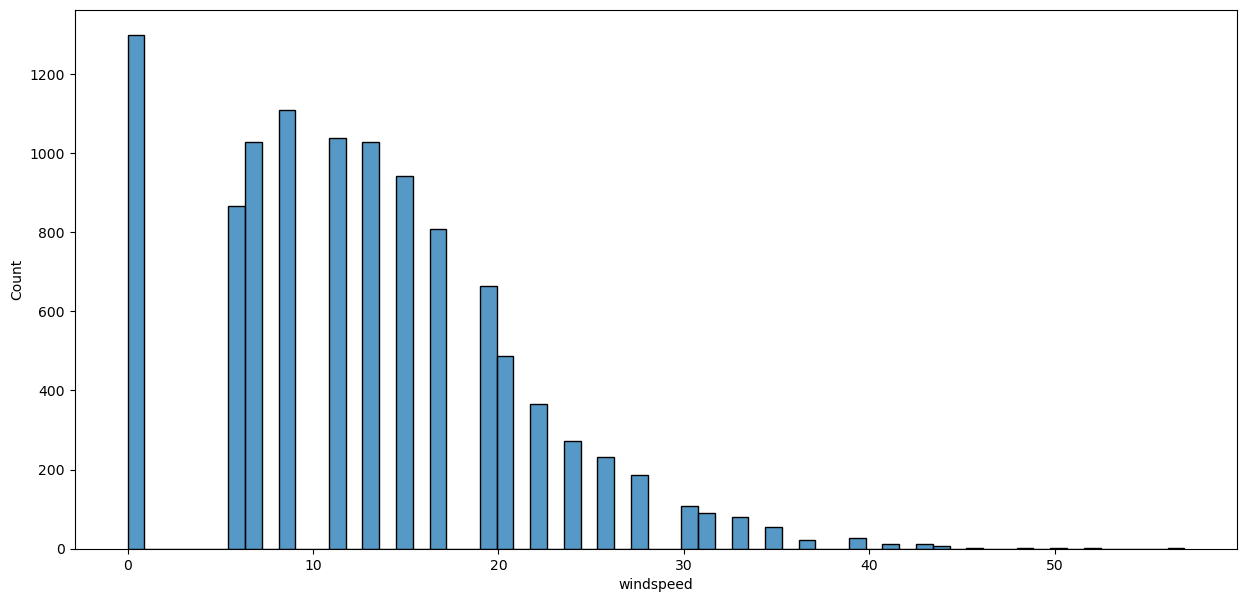

In [25]:
#Detecting outliers in Windspeed Columns
plt.figure(figsize=(15,7))
sns.histplot(data = bike, x = bike.windspeed)

In [26]:
#let's handle the outliers in Windspeed
bike = bike[abs(bike['windspeed'] - bike['windspeed'].mean()) < 3 * bike['windspeed'].std()] #Handling Outliers through Z-Score

<AxesSubplot:xlabel='windspeed', ylabel='Count'>

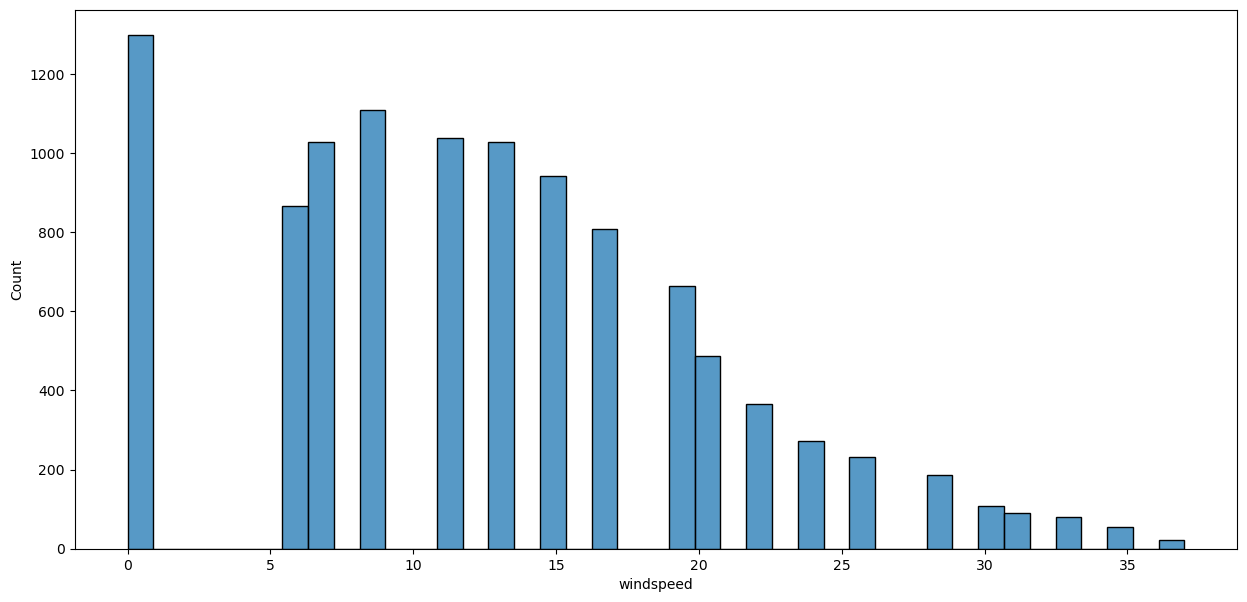

In [27]:
#Validating the changes
plt.figure(figsize=(15,7))
sns.histplot(data = bike, x = bike.windspeed)

## Revalidating the Correlation

<AxesSubplot:>

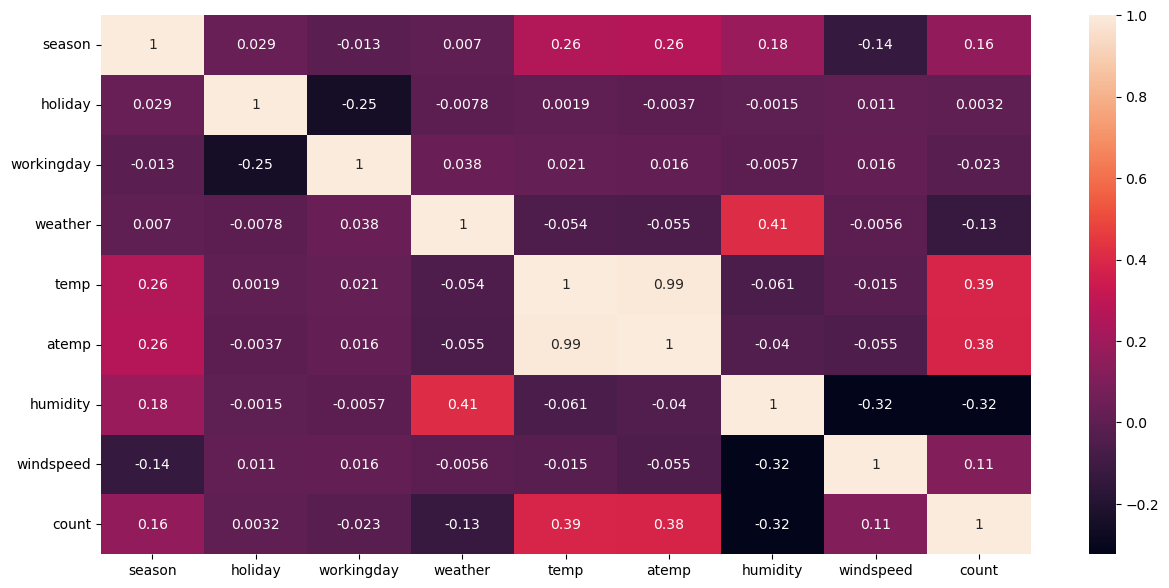

In [28]:
plt.figure(figsize=(15,7))
sns.heatmap(bike.corr(), annot=True)

## Remodeling using Random Forest Regressor

In [29]:
x = bike[['temp','humidity']]
y = bike['count']
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.3, random_state = 0) #(70,30) Train, Validation Split

In [30]:
rfr = RandomForestRegressor()

In [31]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [32]:
rfr_y_train_pred = rfr.predict(x_train)
rfr_y_val_pred = rfr.predict(x_val)

In [33]:
y_train_score = mean_squared_log_error(y_train, rfr_y_train_pred) #MSLE Score
print(y_train_score)

1.646659224839901


In [34]:
y_val_score = mean_squared_log_error(y_val, rfr_y_val_pred) #MSLE Score
print(y_val_score)

1.758155465826338


## The model still can be improved, Next move: Feature Engineering based on the `Date` Column

In [35]:

def hour(dataframe):
    time = pd.DatetimeIndex(dataframe).hour
    return time

def day(dataframe):
    day = pd.DatetimeIndex(dataframe).dayofweek
    return day

def month(dataframe):
    month = pd.DatetimeIndex(dataframe).month
    return month

def year(dataframe):
    year = pd.DatetimeIndex(dataframe).year
    return year

In [36]:
bike['hour'] = hour(bike.datetime)
bike['day'] = day(bike.datetime)
bike['month'] = month(bike.datetime)
bike['year'] = year(bike.datetime)

In [37]:
bike.columns #validating the changes

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'count', 'hour', 'day', 'month',
       'year'],
      dtype='object')

<AxesSubplot:>

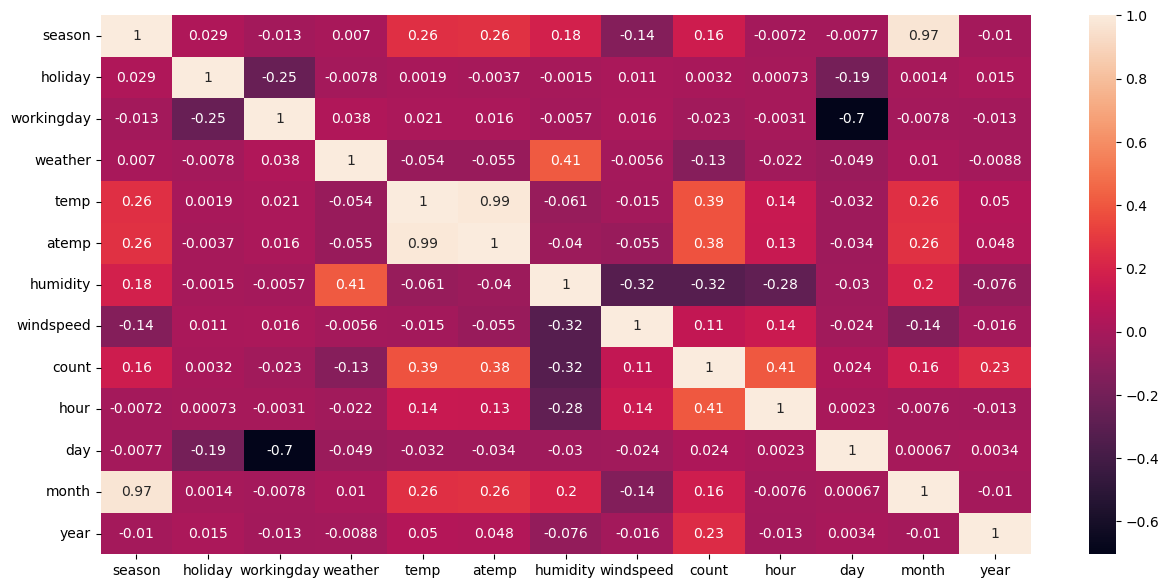

In [38]:
#Revalidating the correlation after adding new columns
plt.figure(figsize=(15,7))
sns.heatmap(bike.corr(), annot=True)

### There's a pretty good correlation between `hour`, `year` and `count`, Hence, Let's add them to x

# Remodeling

### Random Forest Regressor

In [39]:
new_x = bike[['temp','hour','year']]
new_y = bike['count']
new_x_train, new_x_val, new_y_train, new_y_val = train_test_split(new_x, new_y, test_size = 0.3, random_state = 0) #(70,30) Train, Validation Split

In [40]:
rfr.fit(new_x,new_y)

RandomForestRegressor()

In [41]:
rfr_y_train_pred = rfr.predict(new_x_train)
rfr_y_val_pred = rfr.predict(new_x_val)

In [42]:
new_y_train_score = mean_squared_log_error(new_y_train, rfr_y_train_pred) #MSLE Score
print(new_y_train_score)

0.3651412168008605


In [43]:
new_y_val_score = mean_squared_log_error(new_y_val, rfr_y_val_pred) #MSLE Score
print(new_y_val_score)

0.36981340669618934


-----------------------------------------------------

## 🔗 Get In Touch

### [Email](mailto:mustafaa7med@gmail.com) |  [linkedin](https://www.linkedin.com/in/mustafaa7med)

